In [1]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import os
from os import path

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
sns.set_style("whitegrid")

% matplotlib inline

In [2]:
FILE = 'packet_breakdown.txt' # arquivo de interesse
colunas = ['InterfModel,node',
           'Failed, buffer overflow',
           'Failed, busy channel',
           'Failed, no ack',
           'Success, first try',
           'Success, not first try']

# dictData = dict() # dicionario que concentrara todos os dados 
DATA = pd.DataFrame()

In [3]:
def modificar_valor_simulacao(nome_diretorio):
    posicao = nome_diretorio.rfind('_')
    posicao += 1
    return nome_diretorio[posicao:]

In [4]:
def obter_interfmodel(item):
    interfModel = item[12]
    return interfModel

def obter_node(item):
    node = item[19]
    return node

In [5]:
# obtem uma lista de todos arquivos e subdiretorios do diretorio atual
folders = os.listdir()
folders.sort()

In [6]:
for folder in filter(lambda x: path.isdir(x),folders):
    os.chdir(folder)
    if path.isfile(FILE):
        simulacao = modificar_valor_simulacao(folder)
        dfPRR = pd.read_csv(FILE,delimiter='|',names=colunas)
        dfPRR['InterfModel'] = dfPRR['InterfModel,node'].apply(obter_interfmodel)
        dfPRR['node'] = dfPRR['InterfModel,node'].apply(obter_node)
        dfPRR['simulacao'] = simulacao
        DATA = DATA.append(dfPRR,ignore_index=True)
        print('coletado dados de ->\t',folder)
    os.chdir('../')

coletado dados de ->	 simulacao_4.0.0_PA
coletado dados de ->	 simulacao_4.0.1_PB
coletado dados de ->	 simulacao_4.2.1_CLBin_p=0.1
coletado dados de ->	 simulacao_4.2.2_CLBin_p=0.2
coletado dados de ->	 simulacao_4.2.3_CLBin_p=0.3
coletado dados de ->	 simulacao_4.2.4_CLBin_p=0.4
coletado dados de ->	 simulacao_4.2.5_CLBin_p=0.5
coletado dados de ->	 simulacao_4.2.6_CLBin_p=0.6
coletado dados de ->	 simulacao_4.2.7_CLBin_p=0.7
coletado dados de ->	 simulacao_4.2.8_CLBin_p=0.8
coletado dados de ->	 simulacao_4.2.9_CLBin_p=0.9


In [7]:
DATA.sample(5)

,"InterfModel,node","Failed, buffer overflow","Failed, busy channel","Failed, no ack","Success, first try","Success, not first try",InterfModel,node,simulacao
39,"InterfModel=1,node=5",3820.72,7.08,1240.74,1430.82,967.28,1,5,p=0.1
20,"InterfModel=1,node=1",0.30,62.80,1146.94,1344.57,437.50,1,1,PB
104,"InterfModel=2,node=5",2357.11,12.63,314.72,3629.29,1153.40,2,5,p=0.5
32,"InterfModel=0,node=3",24.96,16.08,482.61,2934.03,1031.08,0,3,p=0.1
26,"InterfModel=2,node=2",0.00,78.09,129.30,2387.97,402.67,2,2,PB


In [8]:
DATA.count()

InterfModel,node           165
Failed, buffer overflow    165
Failed, busy channel       165
Failed, no ack             165
Success, first try         165
Success, not first try     165
InterfModel                165
node                       165
simulacao                  165
dtype: int64

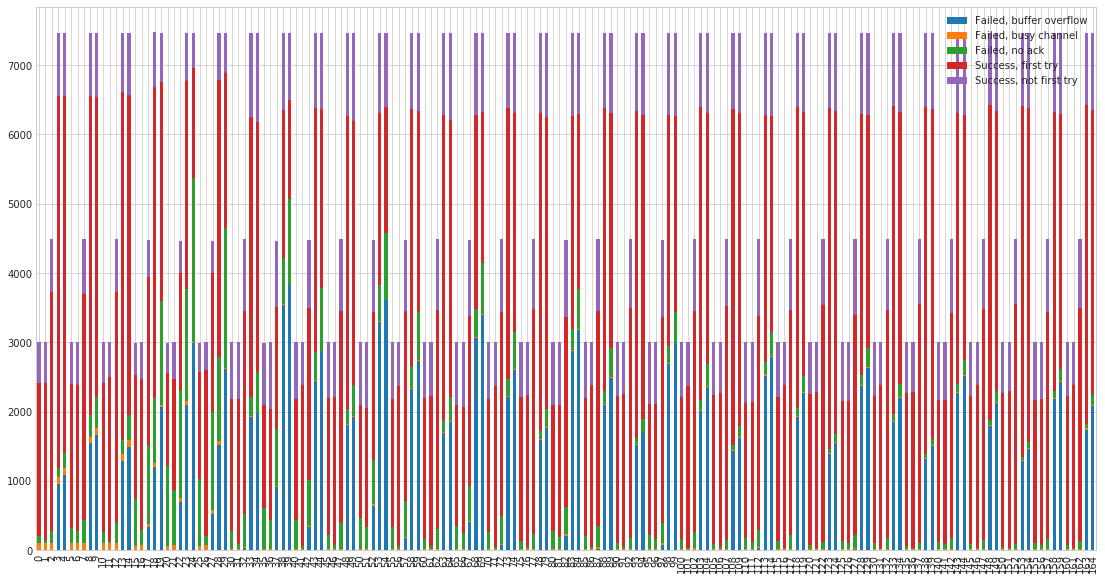

In [9]:
DATA.plot(kind='bar', stacked=True,figsize=(19,10))

In [10]:
DATA['Total Fail'] = DATA[['Failed, buffer overflow', 'Failed, busy channel', 'Failed, no ack']].sum(axis=1)
# axis = 1 indica que a soma sera feita na horizontal, isto é, através das colunas

In [11]:
colunlas_selecionadas = ['Failed, buffer overflow',
       'Failed, busy channel',
       'Failed, no ack',
       'Total Fail',
       'simulacao',
       'InterfModel',
       'node']

dfData = DATA[colunlas_selecionadas].copy()
dfData.head()

,"Failed, buffer overflow","Failed, busy channel","Failed, no ack",Total Fail,simulacao,InterfModel,node
0,0.00,104.03,94.15,198.18,PA,0,1
1,0.00,103.48,46.83,150.31,PA,0,2
2,0.00,110.05,170.73,280.78,PA,0,3
3,952.32,97.61,130.76,1180.69,PA,0,4
4,1090.99,89.82,217.48,1398.29,PA,0,5


In [12]:
dfData = dfData.melt(id_vars=['InterfModel', 'simulacao','node'],
          value_vars=['Failed, buffer overflow', 'Failed, busy channel', 'Failed, no ack'],
          var_name='fail cause',
          value_name = 'value'
         )

dfData.sample(10)

,InterfModel,simulacao,node,fail cause,value
25,2,PB,1,"Failed, buffer overflow",0.11
349,0,PB,5,"Failed, no ack",1501.61
5,1,PA,1,"Failed, buffer overflow",0.00
421,0,p=0.5,2,"Failed, no ack",25.94
311,2,p=0.8,2,"Failed, busy channel",19.75
460,2,p=0.7,1,"Failed, no ack",89.32
452,0,p=0.7,3,"Failed, no ack",99.66
397,1,p=0.3,3,"Failed, no ack",504.12
157,1,p=0.9,3,"Failed, buffer overflow",2.96
366,1,p=0.1,2,"Failed, no ack",415.89


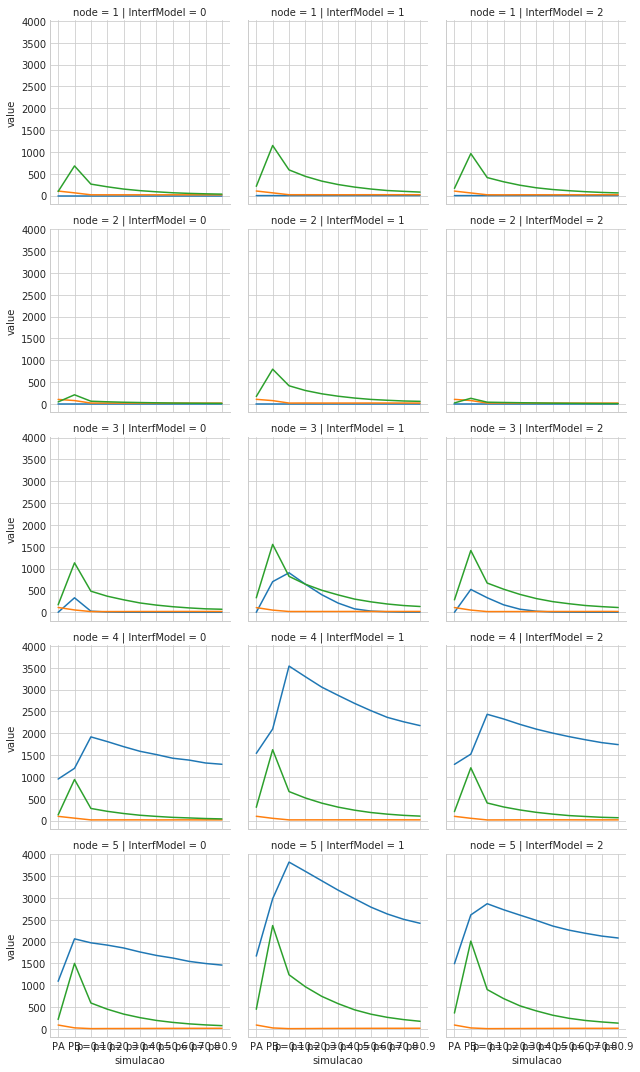

In [13]:
grid = sns.FacetGrid(dfData, col="InterfModel", row="node", hue="fail cause")

grid.map(plt.plot,'simulacao','value')

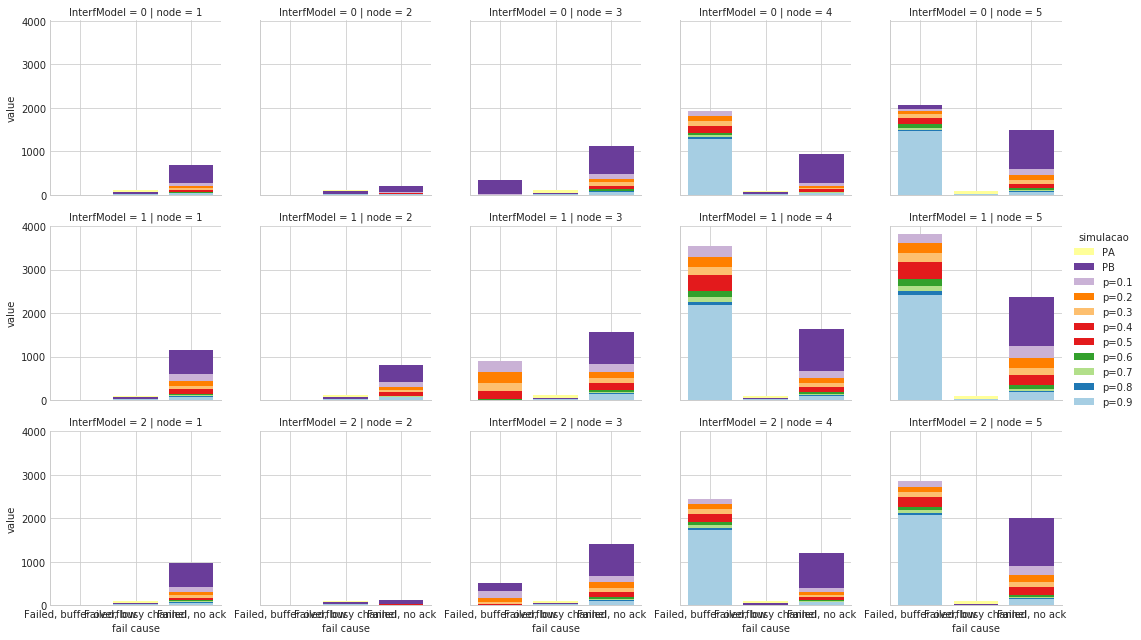

In [22]:
grid = sns.FacetGrid(dfData,
                     col="node",
                     row="InterfModel",
                     hue="simulacao",
                     palette='Paired_r',
                     legend_out=True
                    )

grid.map(plt.bar,'fail cause','value')
grid.add_legend()

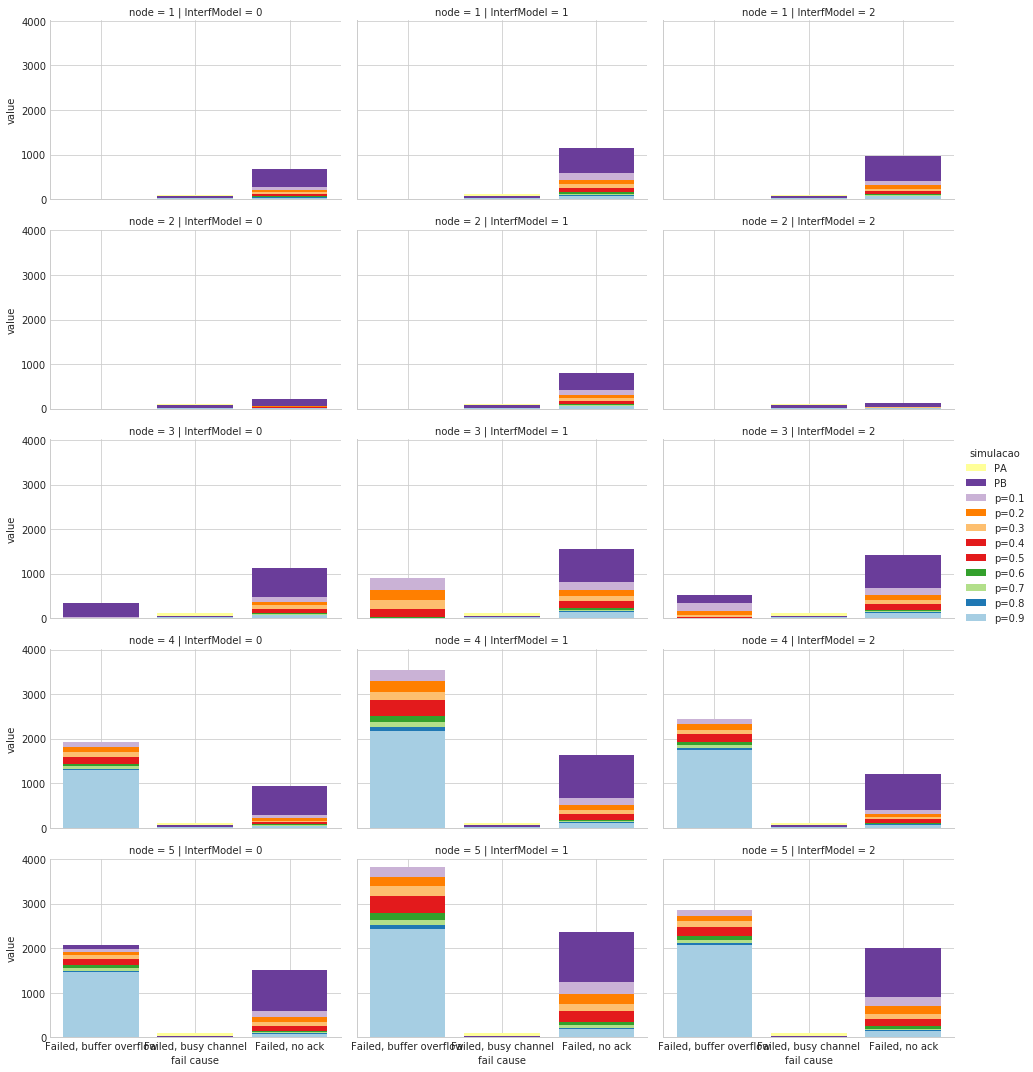

In [42]:
grid = sns.FacetGrid(dfData,
                     row="node",
                     col="InterfModel",
                     hue="simulacao",
                     palette='Paired_r',
                     legend_out=True,
                     aspect=1.5
                    )

grid.map(plt.bar,'fail cause','value')
grid.add_legend()

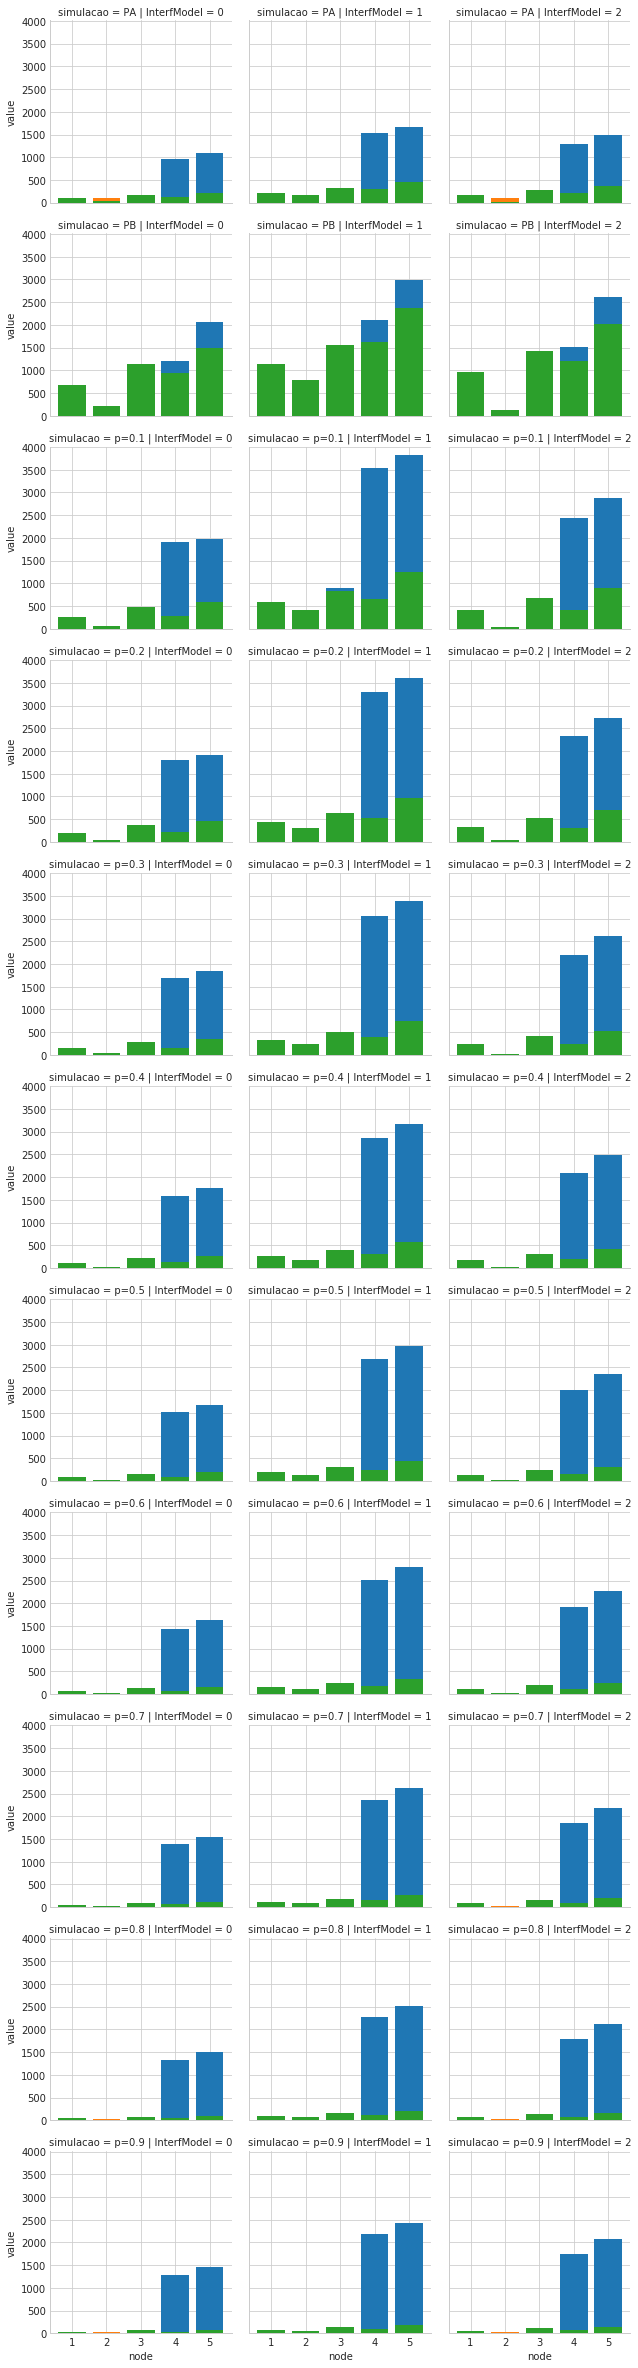

In [15]:
grid = sns.FacetGrid(dfData,
                     col="InterfModel",
                     row="simulacao",
                     hue="fail cause",
                     palette='tab10',
                     legend_out=True
                    )

grid.map(plt.bar,'node','value')

In [16]:
# g = sns.factorplot(x='',y='', hue='node', col='InterfModel',
#                    data=DATA,
#                    kind='bar',
#                    size=6,
#                    palette='mutted'
#                   )

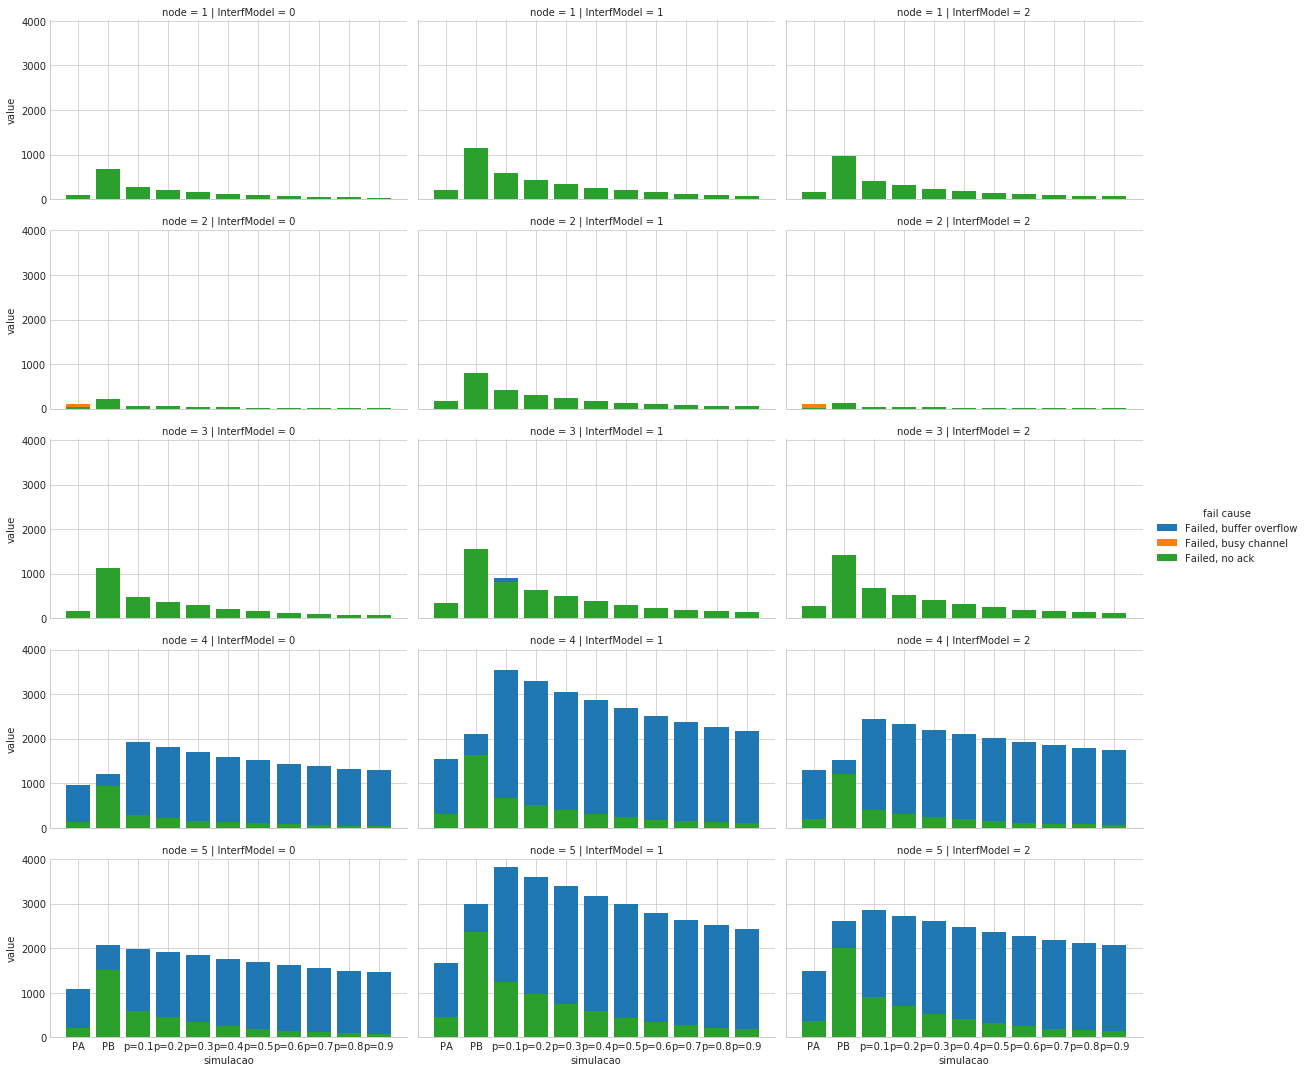

In [38]:
grid = sns.FacetGrid(dfData,
                     col="InterfModel",
                     row="node",
                     hue="fail cause",
                     palette='tab10',
                     legend_out=True,
                     aspect=1.8
                    )

grid.map(plt.bar,'simulacao','value')
grid.add_legend()

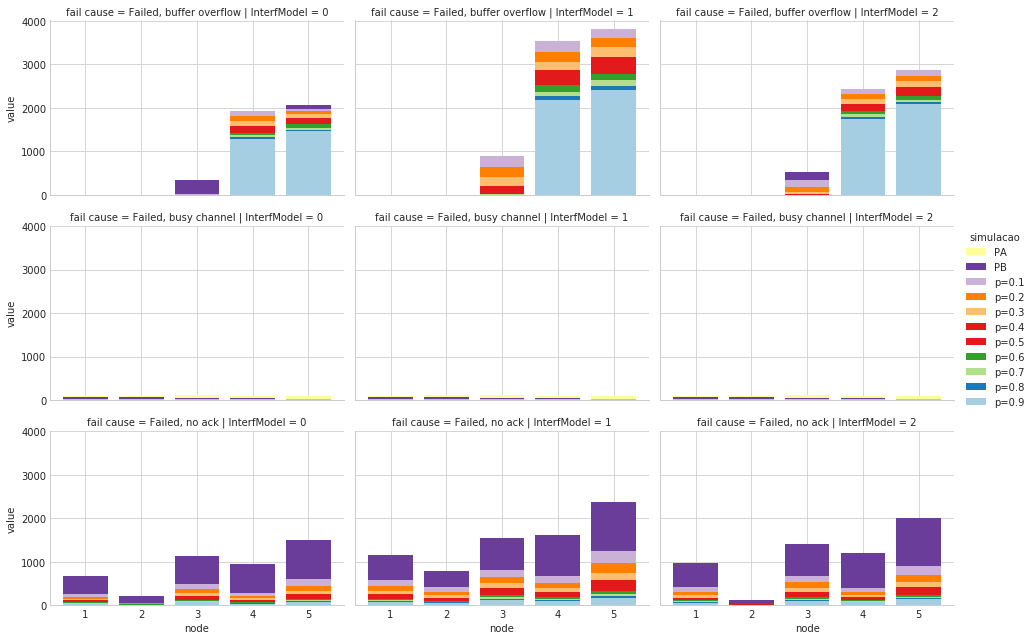

In [41]:
grid = sns.FacetGrid(dfData,
                     col="InterfModel",
                     row="fail cause",
                     hue="simulacao",
                     palette='Paired_r',
                     legend_out=True,
                     aspect=1.5
                    )

grid.map(plt.bar,'node','value')
grid.add_legend()